In [1]:
import matplotlib.pyplot as plt
import numpy as np
import finesse
from math import factorial
import pandas as pd
from scipy import integrate
from scipy.signal import find_peaks
from uncertainties import unumpy, ufloat
from scipy.optimize import curve_fit

finesse.configure(plotting=True)

In [2]:
# # generate fake data

# def Sine(x, amp=1, w=20, phi=1, offset=1):
#     return list(amp*np.sin(w*x*2*np.pi+phi) + offset)

# xdata_f = np.linspace(0, 0.25, 500)
# x = np.linspace(0, 0.05, 100)
# ydata_f = (np.array(Sine(x)*5)+ np.random.rand())*(1+np.random.rand(500)*0.15)
# HG00Area(ydata_f, xdata=xdata_f, pdoffset=6.9e-3, guess=[1, 20, 1, 1])

In [3]:
def drop_return(df, index):
    row = df.loc[index]
    df.drop(index, inplace=True)
    return row

In [4]:
def mean_std(areas):
    areas_mean = np.mean(areas)
    areas_std = np.std(areas)
    
    areas = ufloat(areas_mean, areas_std)
    print(f"Misalignment Loss: {areas}")
    print(f"Misalignment Loss Mean: {areas.nominal_value}")
    print(f"Misalignment Loss STD: {areas.std_dev}")

    return areas

In [5]:
def func_fit(x, amp, w, phi, c):
    return amp * np.sin(2*np.pi*w * x + phi) + c

In [6]:
path1 = './0919/HG00.csv'
# path1 = './0918/HG00_4.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_00 = df1["CH3"].values

['Second' 'Volt' 'Volt']


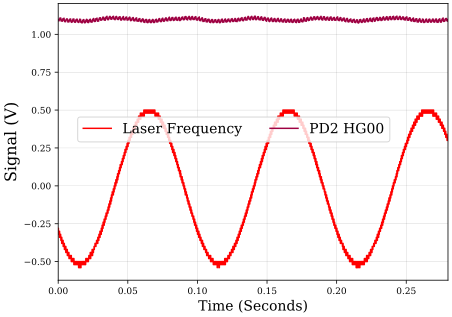

In [7]:
colors = plt.cm.get_cmap("Spectral", 2)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata, PZT, "r", label="Laser Frequency")
ax.plot(xdata, pd2_00, color=colors(0), label="PD2 HG00")
ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Signal (V)", fontsize=16)
plt.legend(loc=(0.05, 0.5), ncol=2, fontsize=14);

In [8]:
colors = plt.cm.get_cmap("Spectral", 5,)
def HG00Area(ydata, xdata=xdata, pdoffset=6.9e-3, guess=[0.2, 20, 90, 0.1], range=[0.1, 0.9], plot=False):
    ydata = ydata - pdoffset
    mean_ydata = np.mean(ydata)
    fig, ax = plt.subplots(figsize=(7, 5))

    ax.plot(xdata, ydata, '#43A6C6')

    length = ydata.shape[0]
    plateau_idx = np.linspace(range[0], range[1], 2)
    # plateau_idx = np.linspace(0.607, 0.96, 2)
    # plateau_idx = [0.04, 0.215, 0.43, 0.64,]
    x1 = plateau_idx[0]
    x2 = plateau_idx[1]
    ax.plot(xdata[int(x1*length)], mean_ydata, '.', color="#FEDE00", markersize=20)
    ax.plot(xdata[int(x2*length)], mean_ydata, '.', color="#FEDE00", markersize=20)

    xdata_ = xdata[int(x1*length):int(x2*length)]
    ydata_ = ydata[int(x1*length):int(x2*length)]
    popt, pcov = curve_fit(func_fit, xdata_, ydata_, p0=guess)
    amp = popt[0]
    offset = popt[-1]
    sigma_amp = (pcov[0][0])**0.5
    sigma_offset = (pcov[-1][-1])**0.5

    amp_u = ufloat(amp, sigma_amp)
    offset_u = ufloat(offset, sigma_offset)

    ax.plot(xdata_, func_fit(xdata_, *popt), '--', color=colors(1), lw=3)
    print(f"The amplitude of the 2 Omega signal is: {popt[0]:.6f}")
    print(f"The offset of the 2 Omega signal is: {popt[-1]:.6f}")
    MisalignmentLoss = 2*amp_u/(amp_u+offset_u)
    # print(sigma_amp/amp)
    # print(sigma_offset/offset)
    print(MisalignmentLoss.std_dev/MisalignmentLoss.nominal_value)

    ax.set_xlabel("Time (Seconds)", fontsize=14)
    ax.set_ylabel("PD Signal (V)", fontsize=16, color="#43A6C6")

    if plot:
        ax2 = ax.twinx()
        ax2.plot(xdata, PZT, "r",)
        ax2.set_ylim([-6, 2.,])
        ax.set_ylim([1.06, 1.14])
        ax2.set_ylabel("PZT Signal (V)", fontsize=16, color="r")
        ax.tick_params(axis='y', colors='#43A6C6')    #setting up X-axis tick color to red
        ax2.tick_params(axis='y', colors='red')    #setting up X-axis tick color to red
        ax2.grid(False)

    # fig.savefig('./Experiment Paper/MisalignmentMeasurement.png', \
    #        bbox_inches='tight', dpi=500, pad_inches=0.01);
    
    return MisalignmentLoss

The amplitude of the 2 Omega signal is: 0.009733
The offset of the 2 Omega signal is: 1.090610
0.008168432155609076


0.017690610505596584+/-0.00014450455170627086

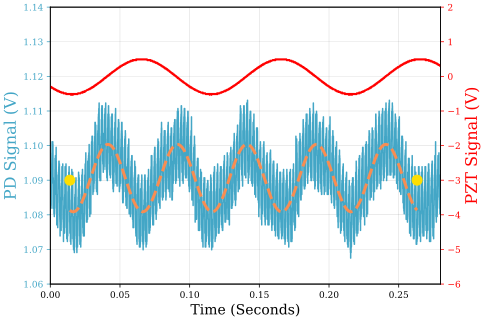

In [9]:
Loss_00 = HG00Area(pd2_00, range=[0.05, 0.94], plot=True)
Loss_00

The amplitude of the 2 Omega signal is: 0.009482
The offset of the 2 Omega signal is: 1.090564
0.009434458953628775


0.01723884924222999+/-0.00016263921558361334

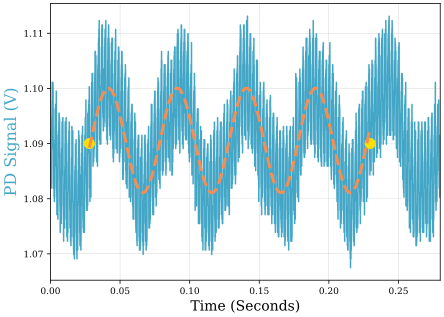

In [54]:
Loss_00 = HG00Area(pd2_00, range=[0.1, 0.82])
Loss_00

In [43]:
Loss_00

0.09484598985320006+/-0.00013136005571488655

In [36]:
Loss_00.std_dev/Loss_00.nominal_value

0.001384982706366415

In [37]:
path1 = './0919/HG11.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_11 = df1["CH3"].values

['Second' 'Volt' 'Volt']


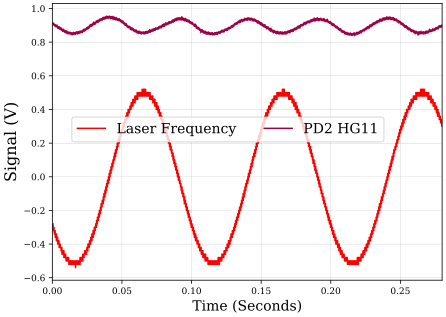

In [46]:
colors = plt.cm.get_cmap("Spectral", 2)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(xdata, PZT, "r", label="Laser Frequency")
ax.plot(xdata, pd2_00, color=colors(0), label="PD2 HG11")
ax.set_xlabel("Time (Seconds)", fontsize=14)
ax.set_ylabel("Signal (V)", fontsize=16)
plt.legend(loc=(0.05, 0.5), ncol=2, fontsize=14);

The amplitude of the 2 Omega signal is: 0.023739
The offset of the 2 Omega signal is: 0.886815
0.0026524681051282323


0.05214142219247937+/-0.00013830345932157691

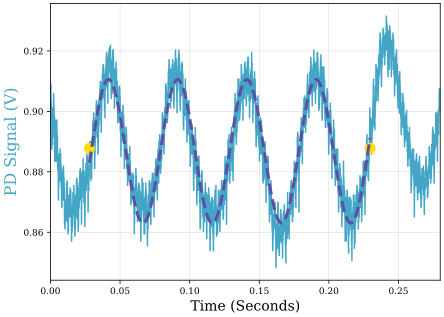

In [47]:
Loss_11 = HG00Area(pd2_11, range=[0.1, 0.82])
Loss_11

In [48]:
Loss_11/Loss_00

0.5502176941600658+/-0.0017075028047002945

In [49]:
(Loss_11/Loss_00).std_dev/(Loss_11/Loss_00).nominal_value

0.003103322235586918

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.030778
The offset of the 2 Omega signal is: 0.678858
0.0016695354832070332


0.08674326237450916+/-0.0001448209544633806

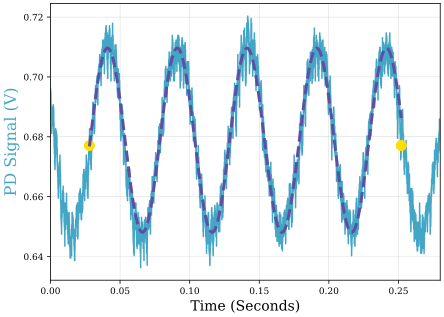

In [17]:
path1 = './0919/HG22.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_22 = df1["CH3"].values

Loss_22 = HG00Area(pd2_22,)
Loss_22

In [18]:
Loss_22/Loss_00

4.903350415581596+/-0.040880721451788046

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.029405
The offset of the 2 Omega signal is: 0.461631
0.0012924614087451024


0.11976574186636368+/-0.0001547925994520027

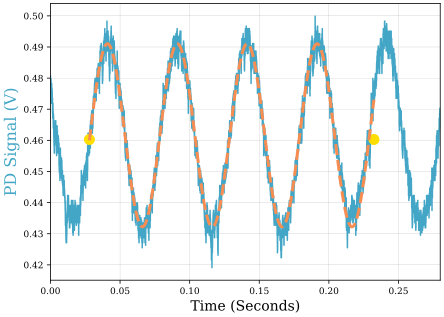

In [15]:
path1 = './0919/HG33.csv'
# path1 = './0918/HG66_4.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_33 = df1["CH3"].values

Loss_33 = HG00Area(pd2_33, range=[0.1, 0.83])
Loss_33

In [16]:
# Loss_00

In [17]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

The amplitude of the 2 Omega signal is: 0.029981
The offset of the 2 Omega signal is: 0.468116
0.0012564613082086723


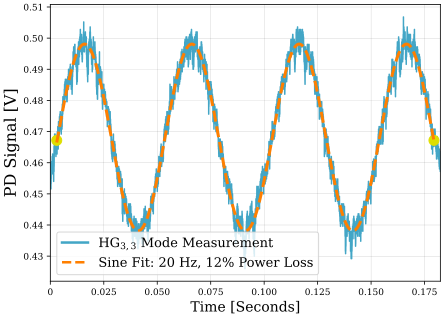

In [21]:
xdata = xdata
ydata = pd2_33
range = [0.1, 0.73]
mean_ydata = np.mean(ydata)
guess = [0.2, 20, 90, 0.1]
fig, ax = plt.subplots(figsize=(7, 5))

# ax.plot(xdata, ydata, color="#43A6C6", label="$\mathrm{HG_{6,6}}$ Mode Measurement")
ax.plot(xdata, ydata, color="#43A6C6", label="$\mathrm{HG_{3,3}}$ Mode Measurement")

length = ydata.shape[0]
plateau_idx = np.linspace(range[0], range[1], 2)
x1 = plateau_idx[0]
x2 = plateau_idx[1]
ax.plot(xdata[int(x1*length)], mean_ydata, '.', color=CB_color_cycle[8], markersize=20)
ax.plot(xdata[int(x2*length)], mean_ydata, '.', color=CB_color_cycle[8], markersize=20)

xdata_ = xdata[int(x1*length):int(x2*length)]
ydata_ = ydata[int(x1*length):int(x2*length)]
popt, pcov = curve_fit(func_fit, xdata_, ydata_, p0=guess)
amp = popt[0]
offset = popt[-1]
sigma_amp = (pcov[0][0])**0.5
sigma_offset = (pcov[-1][-1])**0.5

amp_u = ufloat(amp, sigma_amp)
offset_u = ufloat(offset, sigma_offset)

ax.plot(xdata_, func_fit(xdata_, *popt), '--', color=CB_color_cycle[1], lw=3, label="Sine Fit: 20 Hz, 12% Power Loss")
# ax.plot(xdata_, func_fit(xdata_, *popt), '--', color=CB_color_cycle[1], lw=3, label="Sine Fit: 20 Hz, 82% Power Loss")
print(f"The amplitude of the 2 Omega signal is: {popt[0]:.6f}")
print(f"The offset of the 2 Omega signal is: {popt[-1]:.6f}")
MisalignmentLoss = 2*amp_u/(amp_u+offset_u)
# print(sigma_amp/amp)
# print(sigma_offset/offset)
print(MisalignmentLoss.std_dev/MisalignmentLoss.nominal_value)

ax.set_xlabel("Time [Seconds]", fontsize=14)
ax.set_ylabel("PD Signal [V]", fontsize=16)
offset = 3e-3
ax.set_xlim([0.025, xdata[int(x2*length)]+offset])
# ax.set_ylim([0.425, 0.51])

ticks = np.array([0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2])
ax.set_xticks(ticks)
ax.set_xticklabels([0 if tick==0 else f"{tick:.3f}" for tick in ticks-0.025])
# legend1 = plt.legend(fontsize=13, ncols=1, loc=(0.3, 0.81));
legend1 = plt.legend(fontsize=13, ncols=1, loc="best");

legend_lines = legend1.get_lines()
for idx, line in enumerate(legend_lines):
    line.set_linewidth(2.5)

# fig.savefig('/Users/liutao/Desktop/Thesis/Experiment/MisalignmentLoss_HG33.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01);
# fig.savefig('/Users/liutao/Desktop/Thesis/Experiment/MisalignmentLoss_HG66_10per.pdf', bbox_inches='tight', dpi=300, pad_inches=0.01);


In [55]:
popt
# x, amp, w, phi, c

array([7.74056180e-02, 2.00144920e+01, 9.05694099e+01, 1.06479611e-01])

In [56]:
popt[0]*2/(popt[3]+popt[0])

0.8418905464590227

In [58]:
0.12/0.018

6.666666666666667

In [61]:
82/9.6

8.541666666666668

In [21]:
# 0.019357729783475514/6.279125899051509

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.028238
The offset of the 2 Omega signal is: 0.347357
0.0019716320494340793


0.1503620300097407+/-0.0002964585973851736

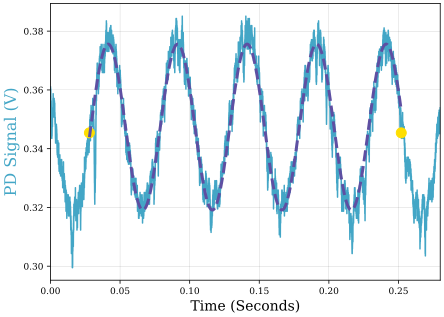

In [22]:
path1 = './0919/HG44.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_44 = df1["CH3"].values

Loss_44 = HG00Area(pd2_44,)
Loss_44

In [23]:
Loss_44/Loss_00

8.499538778617747+/-0.07142172945999599

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.023859
The offset of the 2 Omega signal is: 0.239865
0.002142404624877317


0.18093778328108862+/-0.000387641943716454

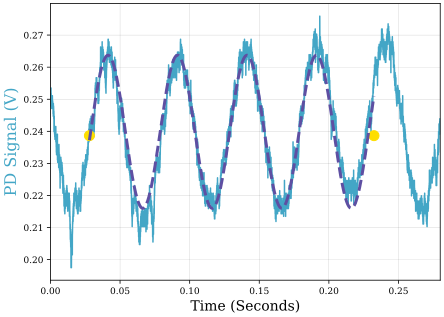

In [24]:
path1 = './0919/HG55.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_55 = df1["CH3"].values

Loss_55 = HG00Area(pd2_55, range=[0.1, 0.83])
Loss_55

In [25]:
Loss_55/Loss_00

10.227899326812228+/-0.08637167671212416

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.019425
The offset of the 2 Omega signal is: 0.164623
0.0020385147431184517


0.21108247785330625+/-0.0004302947431179389

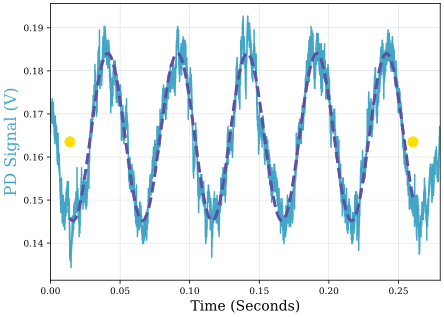

In [43]:
path1 = './0919/HG66.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_66 = df1["CH3"].values

Loss_66 = HG00Area(pd2_66, range=[0.05, 0.93]) #range=[0.63, 0.83]
Loss_66

In [44]:
Loss_66/Loss_00

11.931893350233922+/-0.10045408944118094

In [29]:
Loss_00

0.017690610505596584+/-0.00014450455170627086

In [30]:
0.029834620154330173/10.356996879791167

0.0028806246154755764

['Second' 'Volt' 'Volt']
The amplitude of the 2 Omega signal is: 0.078290
The offset of the 2 Omega signal is: 0.099706
0.0011763346155708035


0.8796828747859665+/-0.0010348014163355692

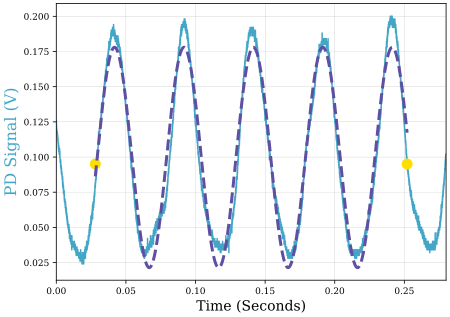

In [27]:
# Example of bad fit with large misalignment
path1 = './0918/HG66_4.csv'

df1 = pd.read_csv(path1, skiprows=10)
units = drop_return(df1, index=0)
print(units.values)

df1 = df1.apply(lambda col:pd.to_numeric(col, errors='coerce'))

xdata = df1["Source"].values
PZT = df1["CH1"].values
pd2_66 = df1["CH3"].values

Loss_66 = HG00Area(pd2_66,) #range=[0.63, 0.83]
Loss_66